In [47]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
import numpy as np 
from google.colab import files
from tensorflow.keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import KFold
 

In [29]:
#load data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#use reshape function in NumPy to make a dimensional array
def reshapingdata(input):
  input = input.reshape(input.shape + (1,))
  input = input / 255
  return input

x_train = reshapingdata(x_train)
x_test = reshapingdata(x_test)

print("Train data shape: {}".format(x_train.shape))
print("Test data shape: {}".format(x_test.shape))

Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [55]:
#define model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.01), metrics=["accuracy"] )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [56]:
#evaluate model
history = model.fit(x_train, y_train, epochs=10)
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5428 - accuracy: 0.8527
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3690 - accuracy: 0.8797
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3714 - accuracy: 0.8806
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3822 - accuracy: 0.8774
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3922 - accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4029 - accuracy: 0.8711
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4083 - accuracy: 0.8731
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4187 - accuracy: 0.8669
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4320 - accuracy: 0.8619
Epoch 10/10
1875/1875 [==============================] - 38s 20m

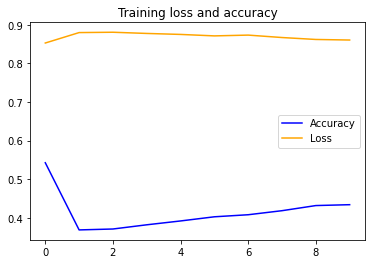

In [72]:

epochs=range(len(acc))

plt.plot(epochs, history.history['loss'], color='blue', label='train')
plt.plot(epochs, history.history['accuracy'], color='orange', label='train')
plt.title("Training loss and accuracy")
plt.legend(["Accuracy", "Loss"])
plt.show()